# **Demo xử lý dữ liệu**

### Cài đặt một số thư viện

In [1]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 1.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 5.2 MB/s eta 0:00:00a 0:00:01


In [2]:
! pip install numpy

In [3]:
!pip install pyspark

## 1. Giới thiệu
#### Kết nối Jupyter notebooks với cụm Spark để xử lý dữ liệu, sử dụng Spark Python API.

## 2. Cụm Spark

### 2.1. Cách kết nối với cụm spark

Để kết nối với cụm spark, trước tiên cần tạo SparkSession với các tham số sau:

+ **appName:** Tên của ứng dụng đang chạy, tên được hiển thị trên [giao diện web Spark Master](http://localhost:8080/);
+ **master:** Spark Master URL;
+ **spark.executor.memory:** phần bộ nhớ dành cho spark executer.

In [4]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

spark = SparkSession.\
        builder.\
        appName("Demo-nhom-24").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "512m").\
        getOrCreate()

23/02/07 15:43:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


## 3. Dữ liệu

**bold text**### 3.1. Giới thiệu

Sử dụng Spark Python API để đọc, xử lý và viết data.

### 3.2. Đọc dữ liệu

Load dữ liệu báo cáo tài chính của các công ty từ cụm Hadoop **Hadoop distributed file system (HDFS)** vào spark data frame.

In [7]:
from pyspark.sql.types import *
# Create a schema for the dataframe
schema = StructType([
    StructField('STT', StringType(), True),
    StructField('Doanh thu', StringType(), True),
    StructField('Quarter1', StringType(), True),
    StructField('Quarter2', DoubleType(),True),
    StructField('Quarter3', DoubleType(),True),
    StructField('Quarter4', DoubleType(),True),
])

df = (spark.read.format("com.databricks.spark.csv")
        .option("header", "true")
        .option("inferSchema","true")
        .schema(schema)
        #Đường dẫn tới HDFS
        .load("hdfs://namenode:9000/data/vinData.csv"))
df.printSchema()
df.createOrReplaceTempView("dfTable")
print("Số  bản ghi:")
print(df.count())
df = df.where(df.STT!= '0')
df.show(20, False)

AnalysisException: Path does not exist: hdfs://namenode:9000/data/vinData.csv;

Let's then display some dataframe metadata, such as the number of rows and cols and its schema (cols name and type).

18228910000000.0


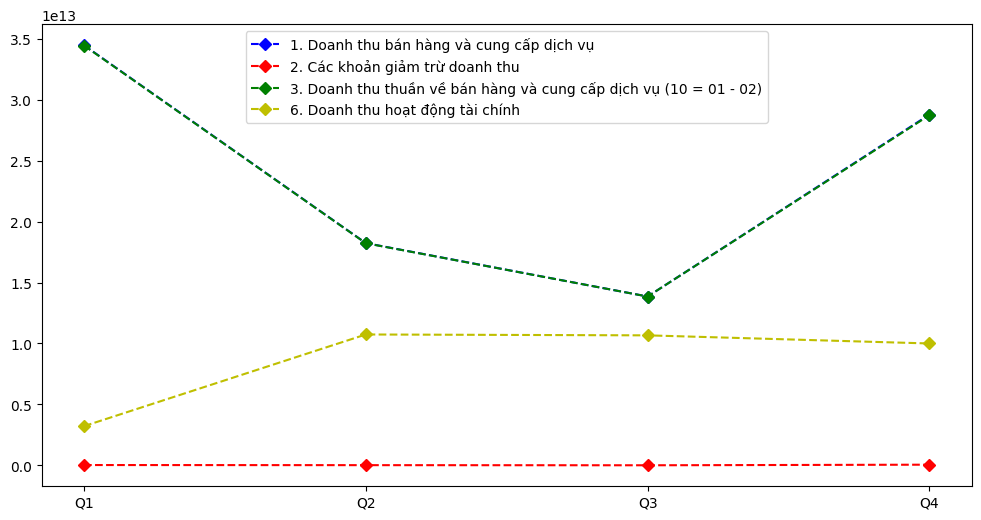

In [ ]:
from pyspark.sql.functions import col, count
fig, ax = plt.subplots()
x =  [float(df.collect()[0][2]), float(df.collect()[0][3]), float(df.collect()[0][4]), float(df.collect()[0][5])]
y = [float(df.collect()[1][2]), float(df.collect()[1][3]),float( df.collect()[1][4]), float(df.collect()[1][5])]
z = [float(df.collect()[2][2]), float(df.collect()[2][3]),float( df.collect()[2][4]), float(df.collect()[2][5])]
t = [float(df.collect()[5][2]), float(df.collect()[5][3]),float( df.collect()[5][4]), float(df.collect()[5][5])]
print(df.collect()[2][3])
title = ['Q1', 'Q2', 'Q3', 'Q4']
plt.plot(title, x, 'bD--', label=df.collect()[0][1])
plt.plot(title, y, 'rD--', label=df.collect()[1][1])
plt.plot(title, z, 'gD--', label=df.collect()[2][1])
plt.plot(title, t, 'yD--', label=df.collect()[5][1])
ax.legend()
fig.set_size_inches(12, 6)
plt.show()


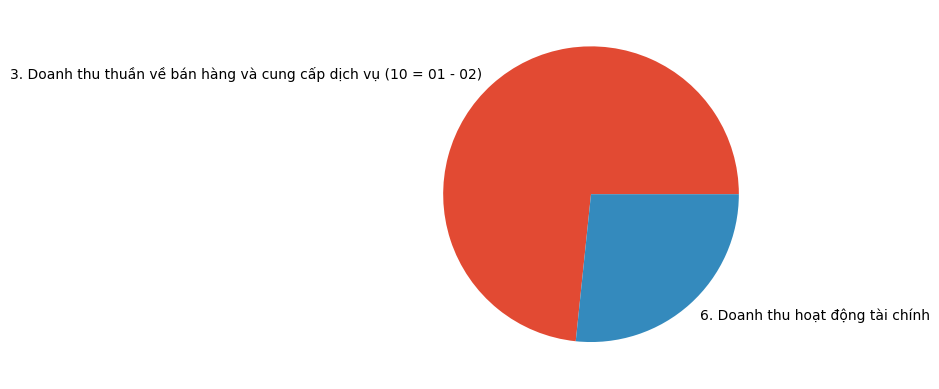

In [ ]:
quy1 = df.collect()[2][2]
pquy1 = df.collect()[3][2]
y = np.array([float(df.collect()[2][2]) + float(df.collect()[2][3]) + float( df.collect()[2][4]) + float(df.collect()[2][5]), float(df.collect()[5][2]) + float(df.collect()[5][3]) + float( df.collect()[5][4]) + float(df.collect()[5][5])])
mylabels = [df.collect()[2][1], df.collect()[5][1]]
plt.pie(y, labels = mylabels)
plt.show()

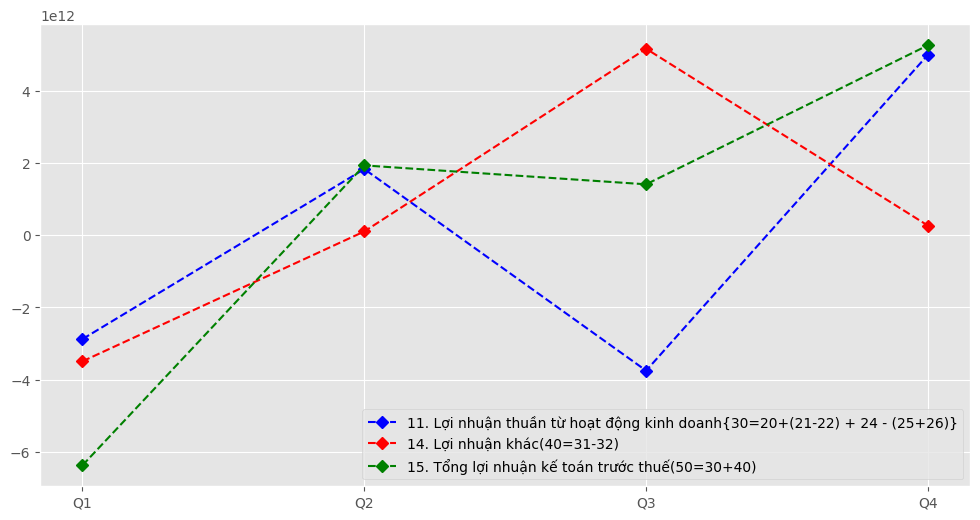

In [ ]:
fig, ax = plt.subplots()
x =  [float(df.collect()[11][2]), float(df.collect()[11][3]), float(df.collect()[11][4]), float(df.collect()[11][5])]
y = [float(df.collect()[14][2]), float(df.collect()[14][3]),float( df.collect()[14][4]), float(df.collect()[14][5])]
z = [float(df.collect()[15][2]), float(df.collect()[15][3]),float( df.collect()[15][4]), float(df.collect()[15][5])]
title = ['Q1', 'Q2', 'Q3', 'Q4']
plt.plot(title, x, 'bD--', label=df.collect()[11][1])
plt.plot(title, y, 'rD--', label=df.collect()[14][1])
plt.plot(title, z, 'gD--', label=df.collect()[15][1])
ax.legend()
fig.set_size_inches(12, 6)
plt.show()

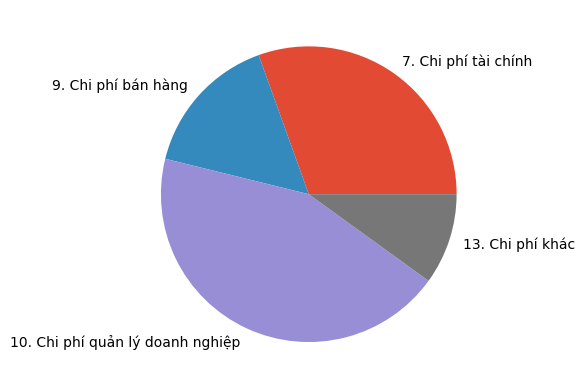

In [ ]:
quy1 = df.collect()[2][2]
pquy1 = df.collect()[3][2]
y = np.array([float(df.collect()[6][2]) + float(df.collect()[6][3]) + float( df.collect()[6][4]) + float(df.collect()[6][5]), float(df.collect()[9][2])+ float(df.collect()[9][3])+float( df.collect()[9][4])+ float(df.collect()[9][5]), float(df.collect()[10][2])+ float(df.collect()[10][3])+float( df.collect()[10][4])+ float(df.collect()[10][5]), float(df.collect()[13][2])+ float(df.collect()[13][3])+float( df.collect()[13][4])+ float(df.collect()[13][5])])
mylabels = [df.collect()[6][1], df.collect()[9][1], df.collect()[10][1], df.collect()[13][1]]
plt.pie(y, labels = mylabels)
plt.show()

### 3.3. Xử lý dữ liệu

In [ ]:
dfProps = (spark.read.format("com.databricks.spark.csv")
        .option("header",  "true")
        .option("inferSchema","true")
        .schema(schema)
        #đường dẫn tới HDFS
        .load("hdfs://192.168.1.241:9000/data/vinPropData.csv"))
dfProps.printSchema()
dfProps.createOrReplaceTempView("dfTable")
print("Số  bản ghi:")
print(dfProps.count())
dfProps = dfProps.where(dfProps.STT!= '0')
dfProps.show(74, False)

root
 |-- STT: string (nullable = true)
 |-- Doanh thu: string (nullable = true)
 |-- Quarter1: string (nullable = true)
 |-- Quarter2: double (nullable = true)
 |-- Quarter3: double (nullable = true)
 |-- Quarter4: double (nullable = true)

Số  bản ghi:
119
+---+---------------------------------------------------+---------------+-----------------+-------------------+-------------------+
|STT|Doanh thu                                          |Quarter1       |Quarter2         |Quarter3           |Quarter4           |
+---+---------------------------------------------------+---------------+-----------------+-------------------+-------------------+
|1  |A- TÀI SẢN NGẮN HẠN                                |163350836000000|1.69506762E14    |2.42652309049999E14|2.69408834795318E14|
|2  |I. Tiền và các khoản tương đương tiền              |19653270000000 |1.5241944E13     |4.2230213805696E13 |2.6449567648582E13 |
|3  |1. Tiền                                            |10308050000000 |6.311683

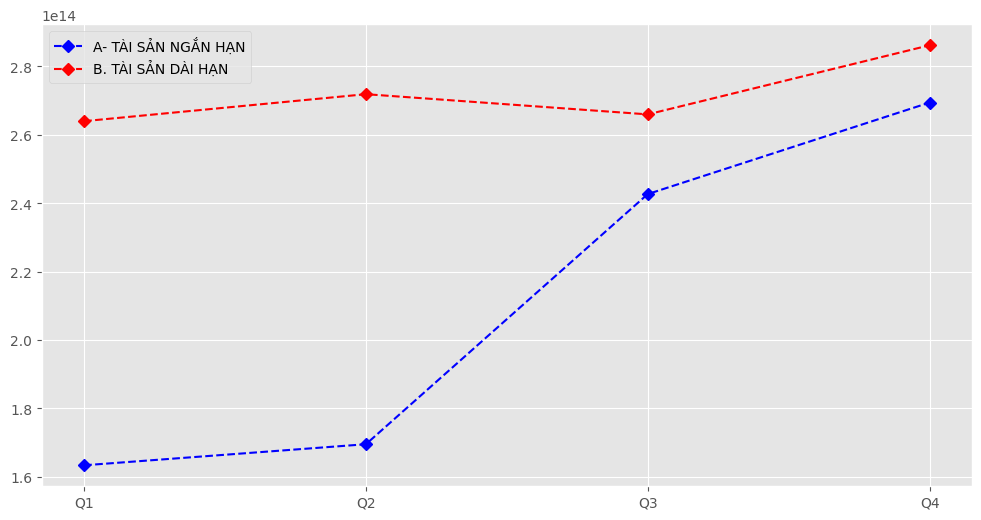

In [ ]:
fig, ax = plt.subplots()
x = [float(dfProps.collect()[0][2]), float(dfProps.collect()[0][3]), float(dfProps.collect()[0][4]), float(dfProps.collect()[0][5])]
y = [float(dfProps.collect()[26][2]), float(dfProps.collect()[26][3]),float(dfProps.collect()[26][4]), float(dfProps.collect()[26][5])]
#z = [float(df.collect()[15][2]), float(df.collect()[15][3]),float( df.collect()[15][4]), float(df.collect()[15][5])]
title = ['Q1', 'Q2', 'Q3', 'Q4']
plt.plot(title, x, 'bD--', label=dfProps.collect()[0][1])
plt.plot(title, y, 'rD--', label=dfProps.collect()[26][1])
#plt.plot(title, z, 'gD--', label=df.collect()[15][1])
ax.legend()
fig.set_size_inches(12, 6) 
plt.show()

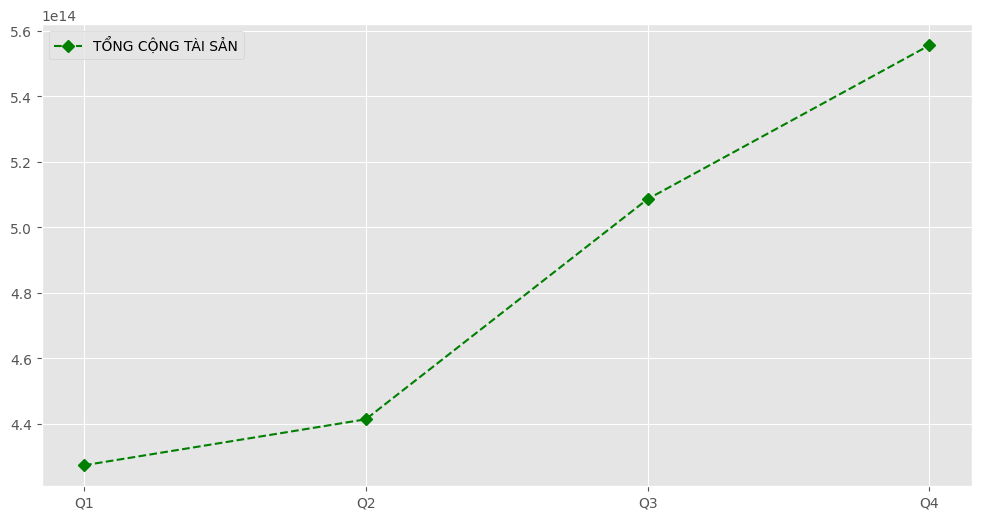

In [ ]:
fig, ax = plt.subplots()
z = [float(dfProps.collect()[63][2]), float(dfProps.collect()[63][3]),float(dfProps.collect()[63][4]), float(dfProps.collect()[63][5])]
#z = [float(df.collect()[15][2]), float(df.collect()[15][3]),float( df.collect()[15][4]), float(df.collect()[15][5])]
title = ['Q1', 'Q2', 'Q3', 'Q4']
plt.plot(title, z, 'gD--', label=dfProps.collect()[63][1])
ax.legend()
fig.set_size_inches(12, 6) 
plt.show()

We successfully selected the desired columns but two problems were found:
+ The first line contains no data but the unit of measurement of each column;
+ There are many years with missing population and unemployment data.

Let's then remove the first line.

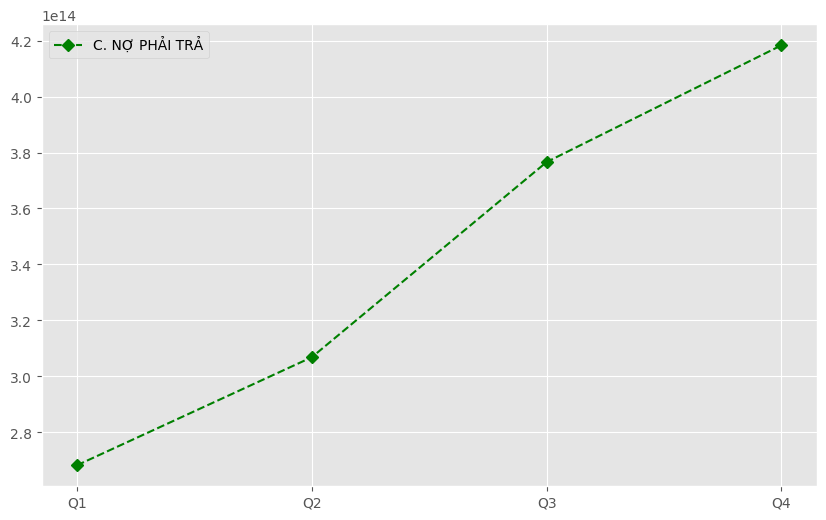

In [ ]:
fig, ax = plt.subplots()
z = [float(dfProps.collect()[65][2]), float(dfProps.collect()[65][3]),float(dfProps.collect()[65][4]), float(dfProps.collect()[65][5])]
title = ['Q1', 'Q2', 'Q3', 'Q4']
plt.plot(title, z, 'gD--', label=dfProps.collect()[65][1])
ax.legend()
fig.set_size_inches(10, 6) 
plt.show()

### 3.4. Định giá doanh nghiệp

Lastly, we persist the unemployment data into the cluster's simulated **HDFS**.

In [ ]:
unemployment.repartition(1).write.csv(path="data/uk-macroeconomic-unemployment-data.csv", sep=",", header=True, mode="overwrite")